In [1]:
import numpy as np
# from projectile import simulator_multioutput, print_results
import mogp_emulator
from mogp_emulator.MeanFunction import Coefficient, LinearMean, MeanFunction
import pandas as pd
from scipy.io import savemat, loadmat
try:
    import matplotlib.pyplot as plt
    makeplots = True
except ImportError:
    makeplots = False
import pickle
def lin2db(x):
    return 10*np.log10(x)
def db2lin(x):
    return 10**(x/10) 
launch_powers = loadmat("data/input_data_mW.mat")['lnch_pow_mW']
noise_powers = loadmat("data/output_data_mW.mat")['tot_noise_pow_mW']

In [5]:
inputs = launch_powers
targets = noise_powers[:,0]

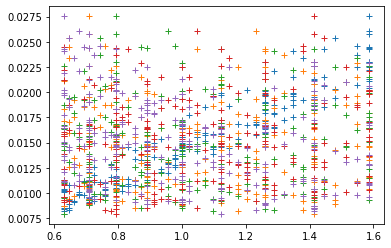

In [6]:
plt.plot(inputs,targets,'+')
plt.show()

In [7]:
launch_powers.shape

(250, 5)

In [92]:
# mf = "I(x[0]**3+c*(x[1]**3)+c*(x[2]**3)+c*(x[3]**3)+c*(x[4]**3))"
# mf = "I(x[0]**3+c*x[1]**3+x[2]**3+x[3]**3+x[4]**3)"
# mf = "x[0]^3+x[1]^3+x[2]^3+x[3]^3+x[4]^3"
mf = "x[0]+x[1]+x[2]+x[3]+x[4]"
print(MeanFunction(mf))

c + c*x[0] + c*x[1] + c*x[2] + c*x[3] + c*x[4]


In [103]:
# gp_map = mogp_emulator.GaussianProcess(inputs, targets, mean="I(x[0]**3)", nugget="fit")
# gp_map = mogp_emulator.GaussianProcess(inputs, targets, mean=mf, nugget="fit")
gp_map = mogp_emulator.GaussianProcess(inputs, targets, mean=mf, kernel='SquaredExponential', nugget="fit")
# fit hyperparameters
gp_map = mogp_emulator.fit_GP_MAP(gp_map)
# gp can be called directly if only the means are desired
pred_means = gp_map(inputs)

Matrix not positive definite, skipping this iteration


In [94]:
print(gp_map.theta)

GPParams with:
mean = [ 0.00553347  0.01743038  0.00051594  0.0006073   0.00189521 -0.00643118]
correlation = [1.26696348 4.78781051 4.37865202 2.4002745  0.42896521]
covariance = 7.895825294168264e-06
nugget = 1.1167465429182157e-08


In [99]:
lin2db(gp_map.theta.mean[0])

-22.5700256892913

In [95]:
pred_means.shape

(250,)

In [96]:
inputs[:,0].shape

(250,)

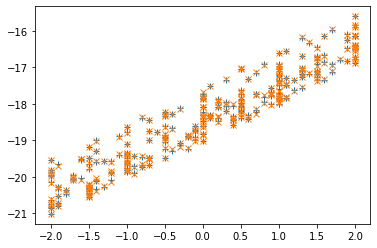

In [100]:
inputs_plt = lin2db(inputs[:,0])
pred_means_plt = lin2db(pred_means)
targets_plt = lin2db(targets)

plt.plot(inputs_plt, pred_means_plt, '+')
plt.plot(inputs_plt, targets_plt, 'x')
plt.show()

In [101]:
np.mean(abs(pred_means - targets))

6.014679936317304e-05

TO DOs:
- work out how to obtain mean function parameters from fitted GP 
- try different mean functions
- see if extrapolation is improved with non-zero mean